# ECON 425 Week 8 Submission by Pranov Suresh

## Question 1

In [1]:
#Importing essential packages and libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Importing data and generating dummies for the categorical variables
bank_data = pd.read_csv("E:/UCLA/Winter 2024/ECON 425/marketing_campaign.csv")
bank_data = pd.get_dummies(bank_data, columns=["default", "loan","housing","job", "marital", "education", "contact", "poutcome"], drop_first= False, dtype= float)
print(bank_data.columns)

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'default_no', 'default_yes', 'loan_no', 'loan_yes',
       'housing_no', 'housing_yes', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


## A choice is made here to build two seperate datasets to test the performance impacts of including the job variable. 

A first dataset is made without the inclusion of the job variable, and the second one drops the variables like marital status, education and contact to include the job variable. This provides an additional layer of flexibility and dynamism when building models and selecting the most performant one. 

In [3]:
#Defining a function to sort data into train and test
train_data, test_data = train_test_split(bank_data, test_size= 0.3334)

def choice1(train,test):
    X_train = train[["age", "default_no","default_yes", "balance", "housing_no", "housing_yes", "loan_no", "loan_yes", "day",
           "duration", "campaign", "pdays", "previous", "marital_divorced", "marital_married", "marital_single",
           "education_primary", "education_secondary", "education_tertiary",
           "education_unknown", "contact_cellular", "contact_telephone",
           "contact_unknown", "poutcome_failure", "poutcome_other",
           "poutcome_success", "poutcome_unknown"]]
    Y_train = train["y"]
    X_test = test[["age", "default_no","default_yes", "balance", "housing_no", "housing_yes", "loan_no", "loan_yes", "day", "duration", "campaign", "pdays", "previous", "marital_divorced", "marital_married", "marital_single",
           "education_primary", "education_secondary", "education_tertiary",
           "education_unknown", "contact_cellular", "contact_telephone",
           "contact_unknown", "poutcome_failure", "poutcome_other",
           "poutcome_success", "poutcome_unknown"]]
    Y_test = test["y"]
    return X_train, Y_train, X_test, Y_test

X_train1, Y_train1, X_test1, Y_test1 = choice1(train_data, test_data)

In [4]:
def choice2(train,test):
    X_train = train[["age", "default_no","default_yes", "balance", "housing_no", "housing_yes", "loan_no", "loan_yes","day",
           "duration", "campaign", "pdays", "previous", "job_admin.","job_blue-collar", "job_entrepreneur", "job_housemaid",
           "job_management", "job_retired", "job_self-employed", "job_services","job_student", "job_technician", "job_unemployed", "job_unknown", "poutcome_failure", "poutcome_other",
           "poutcome_success", "poutcome_unknown"]]
    Y_train = train["y"]
    X_test = test[["age", "default_no","default_yes", "balance", "housing_no", "housing_yes", "loan_no", "loan_yes","day",
           "duration", "campaign", "pdays", "previous", "job_admin.","job_blue-collar", "job_entrepreneur", "job_housemaid",
           "job_management", "job_retired", "job_self-employed", "job_services","job_student", "job_technician", "job_unemployed", "job_unknown", "poutcome_failure", "poutcome_other",
           "poutcome_success", "poutcome_unknown"]]
    Y_test = test["y"]
    return X_train, Y_train, X_test, Y_test

X_train2, Y_train2, X_test2, Y_test2 = choice2(train_data, test_data)

In [5]:
#Building a classifier function
def classifier(n, X, Y, X1, Y1):
    forest = RandomForestClassifier(n_estimators=n, criterion='gini', max_features='sqrt')
    forest.fit(X,Y)
    y_pred = forest.predict(X1)
    y_true = Y1
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label="no")
    precision = precision_score(y_true, y_pred, pos_label="no")
    fscore = f1_score(y_true, y_pred, pos_label="no")
    return precision, accuracy, recall, fscore

In [6]:
#Generating results from the classifier for the first dataset
tree_range = [1,2,3,4,5,10,20,50]
table1 = []
for i in tree_range:
    precision1, accuracy1, recall1, fscore1 = classifier(i, X_train1, Y_train1, X_test1, Y_test1)
    results = {"Trees": i, "Precision":precision1, "Accuracy":accuracy1, "Recall": recall1, "F1-Score":fscore1}
    table1.append(results)

table1 = pd.DataFrame(table1)
table1.set_index("Trees", inplace= True)
table1

,Precision,Accuracy,Recall,F1-Score
Trees,,,,
1,0.922705,0.862545,0.921037,0.921870
2,0.902890,0.885233,0.974458,0.937310
3,0.921068,0.878997,0.943415,0.932107
4,0.908433,0.891270,0.974759,0.940428
5,0.919295,0.886759,0.955244,0.936925
10,0.916122,0.896245,0.971067,0.942794
20,0.915521,0.897439,0.973327,0.943540
50,0.917866,0.897837,0.970841,0.943610


In [7]:
#Generating results from the classifier for the second dataset
table2 = []
for i in tree_range:
    precision1, accuracy1, recall1, fscore1 = classifier(i, X_train2, Y_train2, X_test2, Y_test2)
    results = {"Trees": i, "Precision":precision1, "Accuracy":accuracy1, "Recall": recall1, "F1-Score":fscore1}
    table2.append(results)

table2 = pd.DataFrame(table2)
table2.set_index("Trees", inplace= True)
table2

,Precision,Accuracy,Recall,F1-Score
Trees,,,,
1,0.917098,0.857171,0.921037,0.919063
2,0.904516,0.887356,0.974985,0.938429
3,0.918360,0.878997,0.946730,0.932329
4,0.906810,0.887555,0.972197,0.938366
5,0.917976,0.885565,0.955395,0.936312
10,0.914934,0.895515,0.971670,0.942449
20,0.915601,0.895714,0.971067,0.942519
50,0.916039,0.896643,0.971670,0.943035


In [8]:
#Building a new classifier function to integrate bagging
def classifier2(n, X, Y, X1, Y1):
    forest = RandomForestClassifier(n_estimators=n, criterion='gini', max_features=len(X.columns))
    forest.fit(X,Y)
    y_pred = forest.predict(X1)
    y_true = Y1
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label="no")
    precision = precision_score(y_true, y_pred, pos_label="no")
    fscore = f1_score(y_true, y_pred, pos_label="no")
    return precision, accuracy, recall, fscore

In [9]:
#Generating results from the classifier for the first dataset
table3 = []
for i in tree_range:
    precision1, accuracy1, recall1, fscore1 = classifier(i, X_train1, Y_train1, X_test1, Y_test1)
    results = {"Trees": i, "Precision":precision1, "Accuracy":accuracy1, "Recall": recall1, "F1-Score":fscore1}
    table3.append(results)

table3 = pd.DataFrame(table3)
table3.set_index("Trees", inplace= True)
table3

,Precision,Accuracy,Recall,F1-Score
Trees,,,,
1,0.924293,0.863872,0.920811,0.922549
2,0.902837,0.886361,0.975964,0.937977
3,0.920009,0.882380,0.948915,0.934238
4,0.908393,0.888483,0.971293,0.938790
5,0.920148,0.888152,0.955922,0.937694
10,0.914726,0.894520,0.970690,0.941877
20,0.916726,0.897705,0.972122,0.943611
50,0.917704,0.898700,0.972122,0.944129


In [10]:
#Generating results from the classifier for the second dataset
table4 = []
for i in tree_range:
    precision1, accuracy1, recall1, fscore1 = classifier(i, X_train2, Y_train2, X_test2, Y_test2)
    results = {"Trees": i, "Precision":precision1, "Accuracy":accuracy1, "Recall": recall1, "F1-Score":fscore1}
    table4.append(results)

table4 = pd.DataFrame(table4)
table4.set_index("Trees", inplace= True)
table4

,Precision,Accuracy,Recall,F1-Score
Trees,,,,
1,0.917824,0.858233,0.921489,0.919653
2,0.901567,0.884370,0.975136,0.936910
3,0.920265,0.877604,0.942661,0.931328
4,0.906454,0.889147,0.974684,0.939331
5,0.917666,0.886825,0.957354,0.937090
10,0.912429,0.894388,0.973478,0.941966
20,0.916132,0.894388,0.968731,0.941698
50,0.915022,0.895184,0.971142,0.942247


In [11]:
#Building a function to plot the various metrics for each model
def plotter(data):
    plt.figure(figsize=(16,10))
    plt.plot(data.index, data["Precision"], color="Black", label = "Precision")
    plt.plot(data.index, data["Accuracy"], color="Blue", label = "Accuracy")
    plt.plot(data.index, data["Recall"], color="Red", label = "Recall")
    plt.plot(data.index, data["F1-Score"], color="Green", label = "F1-Score")
    plt.legend()
    plt.xlabel("Number of Trees")
    plt.ylabel("Metrics")
    plt.title("Performance metrics of Random Forest Classifier across varying number of trees")

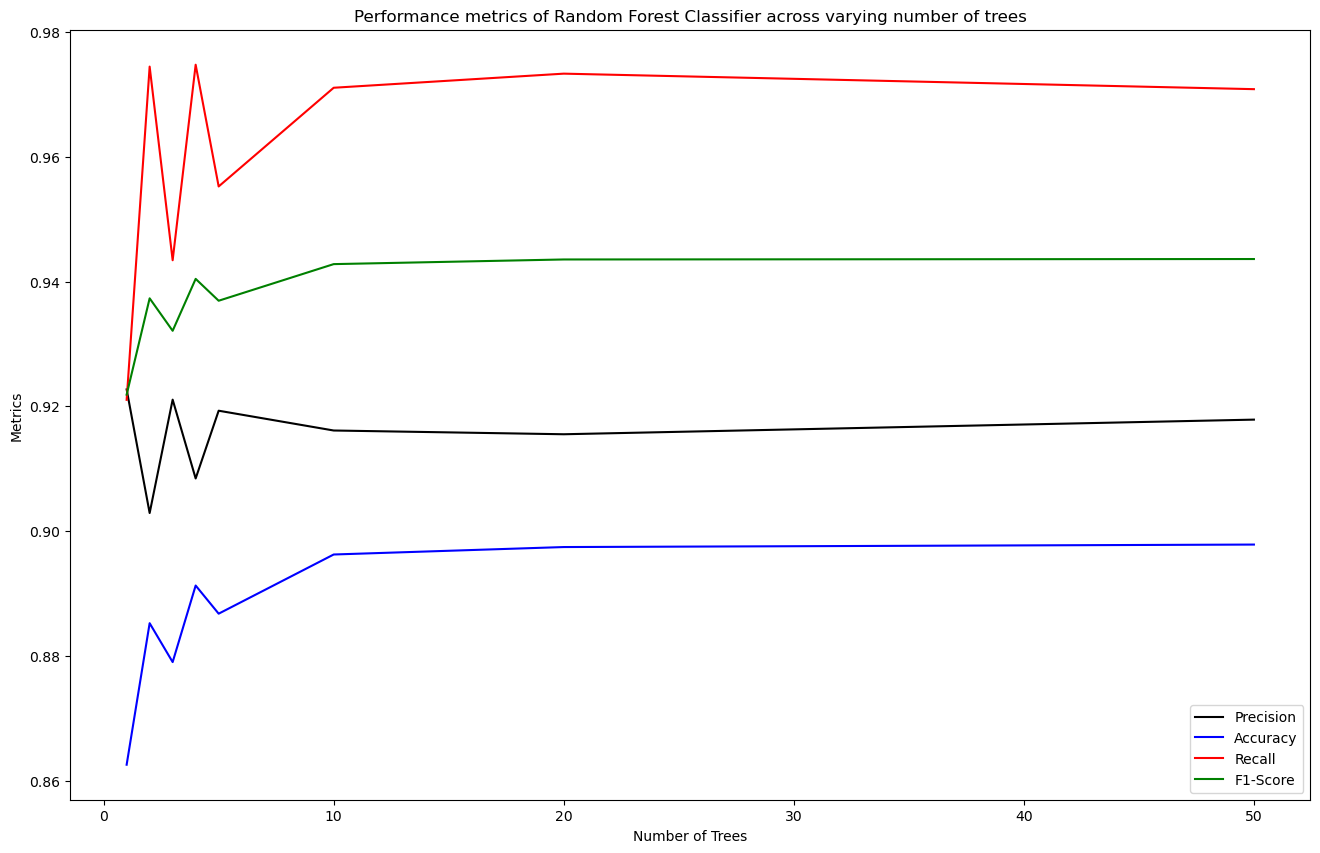

In [12]:
plotter(table1)

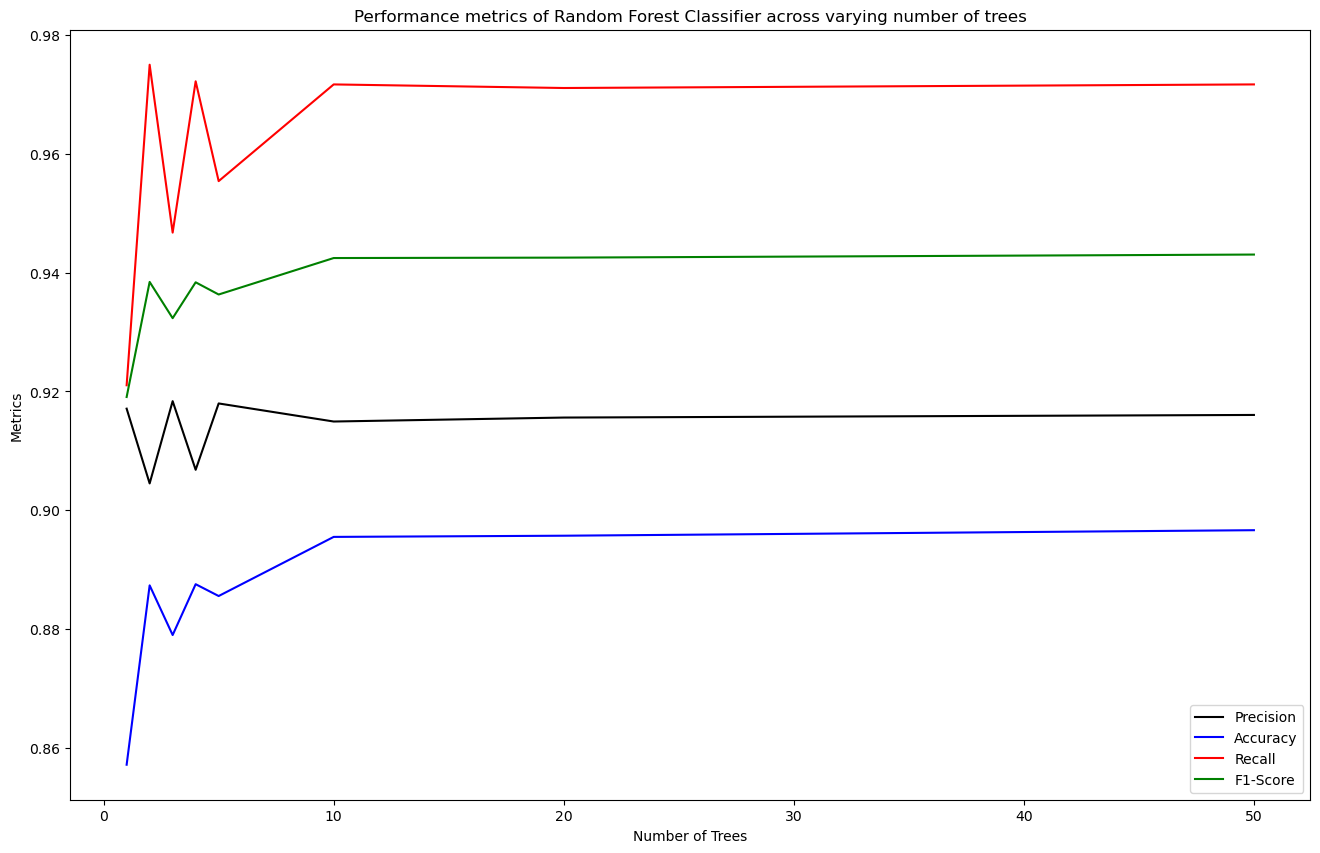

In [13]:
plotter(table2)

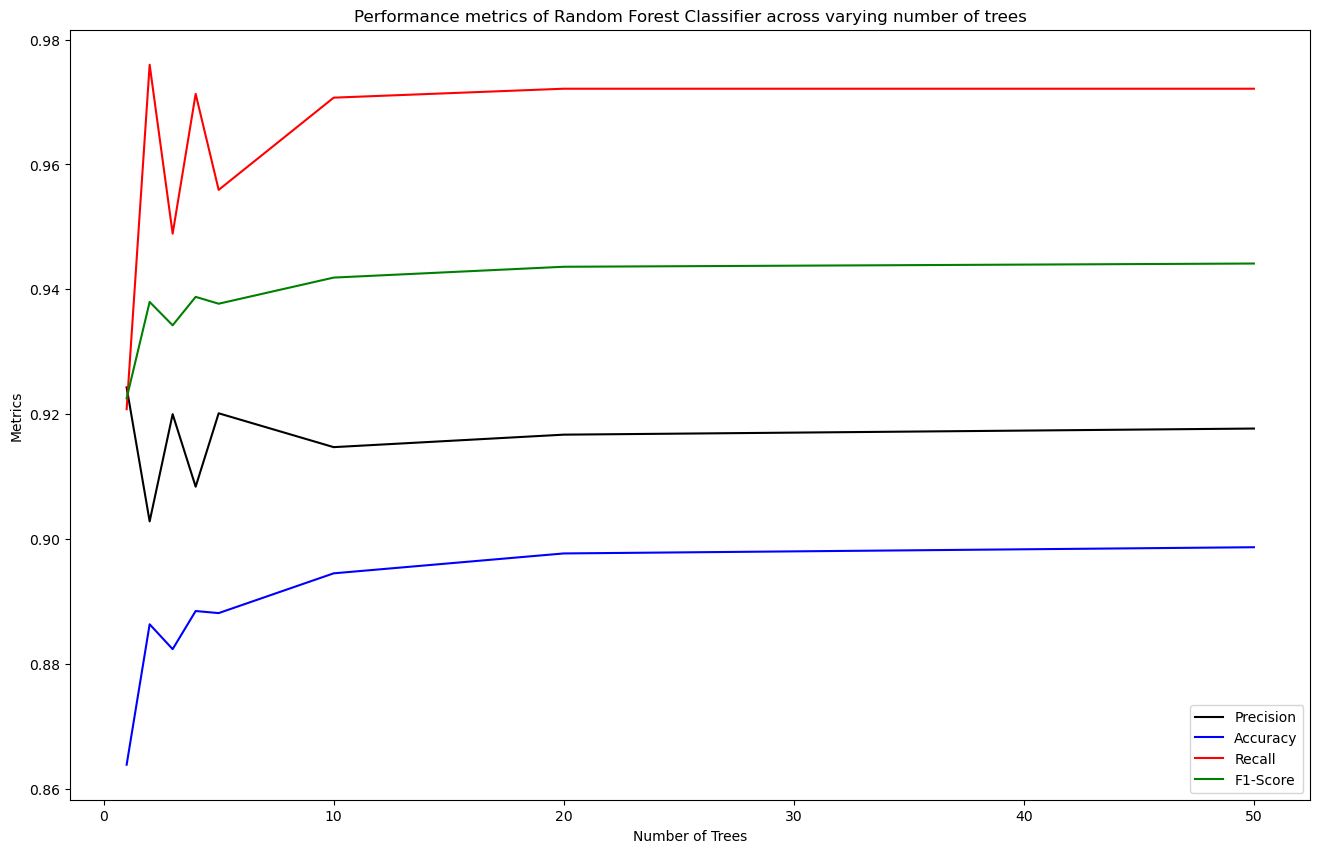

In [14]:
plotter(table3)

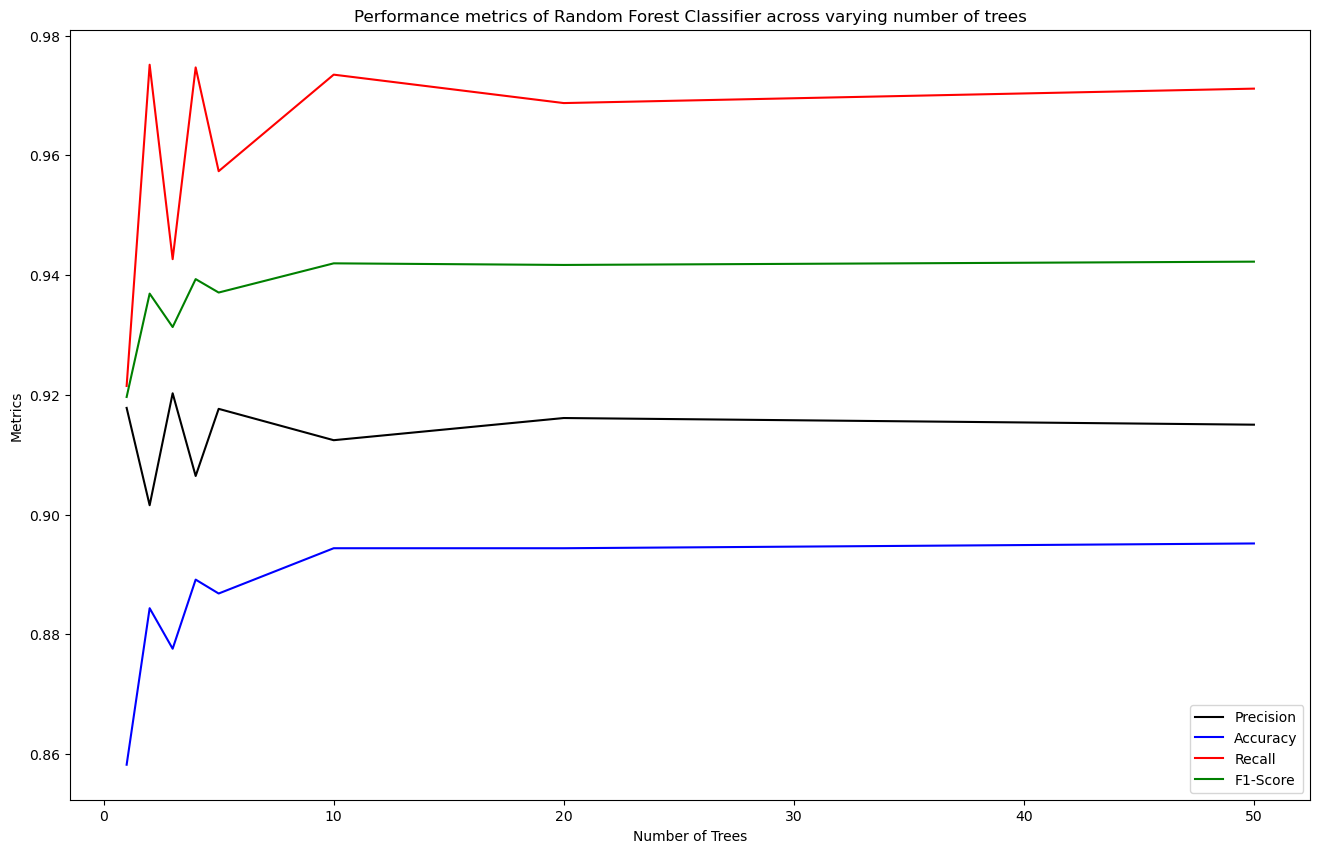

In [15]:
plotter(table4)

## Based on a combined assessment of the metrics, and the graphs, it is clear that an increase in the number of trees has generally improved model performance. Even among the best models, the margins of performance difference are extremely thin, with the differentiating factor being the second or third decimal most often. 

### Typically F1-score as a composite indicator of both recall and precision can be the first basis for eliminating models. Given that even on F1-score, several models are very competitive, we need to dive deeper into the other available metric, accuracy. Based on a combination of both these metrics, the best models have an F1-score in the range of 94% and accuracy near 90%. 

### The specific model chosen here is the final model in Table 3, which uses the first dataset and the second clsssifier. Essentially, it utilises bagging, and does not include the job variable in favour of the other categorical variables. It showcases a high F1-score of 94.5% and a 89.9% accuracy. Both these metrics are great, and point toward a very good model.

In [16]:
clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_features=len(X_train1.columns))
clf.fit(X_train1,Y_train1)

RandomForestClassifier(max_features=27, n_estimators=50)

In [17]:
feature_imp = clf.feature_importances_
feature_imp

array([0.11708407, 0.00099652, 0.00105599, 0.15043639, 0.01006873,
       0.01076335, 0.00647524, 0.00654719, 0.09812213, 0.30314933,
       0.03967809, 0.04834041, 0.01833572, 0.0085328 , 0.00933998,
       0.00982684, 0.0070978 , 0.01057207, 0.0126365 , 0.00513867,
       0.00639709, 0.00445925, 0.01252512, 0.00362287, 0.00395905,
       0.09279562, 0.00204318])

[]

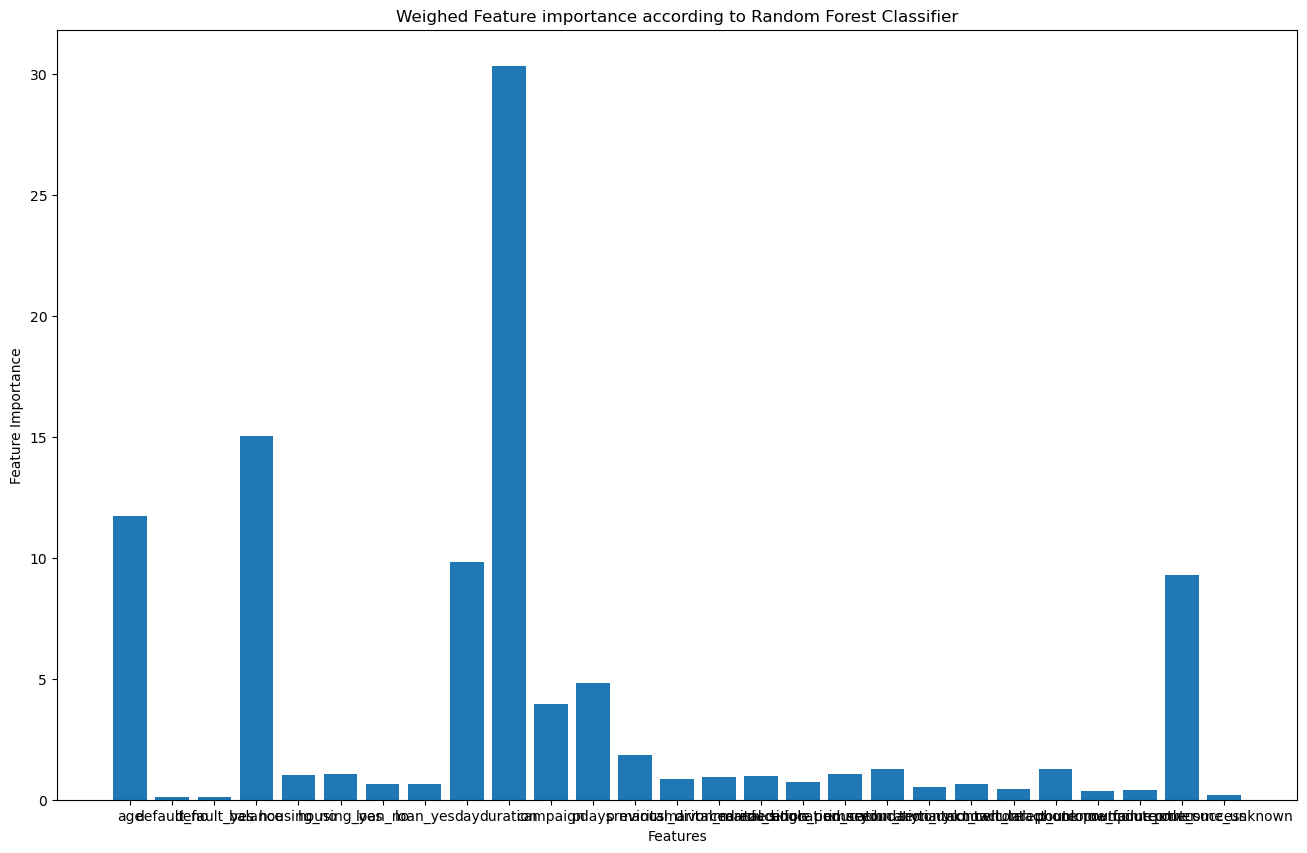

In [18]:
plt.figure(figsize = (16,10))
plt.bar(X_train1.columns, feature_imp*100)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Weighed Feature importance according to Random Forest Classifier")
plt.plot()

In [19]:
X_train1.columns

Index(['age', 'default_no', 'default_yes', 'balance', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

## Q1 - iii)

## Based on the plot showing the weighted feature importance, it is clear that the feature "duration" is dominant over all other features. Looking at the array itself, it has a feature importance of 0.3, which is well ahead of the others. 

### The other features which have high importance such as balance, age, and day are still within a range that does not exceed 0.15 which is well behind the feature importance of duration. 

In an economic sense, thinking about the context of the dataset itself, it is clear that the amount of time spent on call talking to the customer the last time would have a serious impact on the ability of the customer service representative to influence their decision. Duration will have a direct impact on the outcome, as even if there is not a linear relationship between previous call length and signups to the term deposit, we can understand that long calls will tend to occur only when the prospective customer consents to such a conversation. In most marketing contexts, customers do not pick up calls from unknown numbers,and even if they do they usually hang up once they become aware that the call is a marketing call. Thus a larger integer value of this variable would indicate a long conversation, which in this context would help explain their decision to become a customer of the bank's term deposit product. 

## Q1 - iv)

## All the metrics collected in the tables show the fluctuating pattern in the early stages insinuated by the question, and this is again reflected in the plots. When the "density" of the forests as represented by the number of decision trees deployed is relatively very low, it is clear that the number of trees being lower than the number of nodes is impacting the Random Forest model. This is further compounded by the fact that general academic literature and research guides the usage of Random forest models to have the number of trees that are at least close to being proportional to the number of features in the dataset. 

In our dataset we have more than 15 features that are being trained and tested on, meaning that until we hit a minimum of 10 trees, the number of trees is wholly inadequate to deal with the vast number of features in the dataset. 

What is also not optimal is the complete neglect of the optimal subset selection feature of RandomForest, where we set a high number of trees and allow the model to pick the most optimal subset of them that perform the best. When having less trees, such sub-sampling is simply impossible. 